In [15]:

import pandas as pd
import numpy as np
import os 
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
here = Path.cwd()
root = next(p for p in [here, *here.parents] if (p / "data" / "raw").exists())

df = pd.read_csv(root / "data" / "raw" / "android_turns.csv", header=0)
df.head()

,init_time,eventAction,payloadCreation,eventStart,eventEnd,eventType,eventSampleSpeed,eventDurationSeconds,eventMilesDriven,eventStartLatitude,...,gpsMedianLateralAccel,gpsP75LateralAccel,gpsP95LateralAccel,bearing_angular_change_per_second,gyro_angular_change_per_second,bearingAngleChange,gyroAngleChange,mems_radius,gps_radius,validity_mean
0,1.172144e+08,1,1,670340.75,677584.90,4,10.394929,7.244125,0.016991,41.774303,...,0.738191,0.800598,0.854956,8.662511,9.521707,67.59688,69.319600,22.941639,20.335337,1
1,1.172144e+08,1,1,250180.31,257678.03,4,9.401910,7.497719,0.016103,41.802270,...,0.926223,1.051501,1.147173,9.708605,11.245602,80.07132,84.723694,20.737572,21.819538,1
2,1.122337e+09,1,1,852694.94,860628.70,4,6.750588,7.933750,0.012202,41.822826,...,1.197002,1.415529,1.806123,20.356073,2.534807,249.20390,20.211075,18.100092,8.500866,1
3,1.122337e+09,1,1,778673.60,783632.25,5,10.084871,4.958625,0.014104,41.822826,...,1.343501,2.203393,4.873099,16.093168,4.245962,162.20609,21.221228,20.195393,14.847904,1
4,1.122337e+09,1,1,711669.90,716628.94,4,5.592350,4.959063,0.009630,41.822876,...,2.485116,2.862883,3.406215,29.804018,1.212521,295.70374,6.061072,209.791600,3.592705,1


In [11]:
df = df.drop('eventAction', axis = 1)
df = df.drop('eventSpeedChange', axis = 1)
df = df.drop('payloadCreation', axis = 1)
df = df.drop('validity_mean', axis = 1)

df.columns.to_list()

['init_time',
 'eventStart',
 'eventEnd',
 'eventType',
 'eventSampleSpeed',
 'eventDurationSeconds',
 'eventMilesDriven',
 'eventStartLatitude',
 'eventStartLongitude',
 'eventEndLatitude',
 'eventEndLongitude',
 'eventSensorDetectionMthd',
 'eventGPSSignalStrength',
 'eventStartSpeed',
 'eventEndSpeed',
 'memsMedianLateralAccel',
 'memsP75LateralAccel',
 'memsP95LateralAccel',
 'memsMedianHorizontalNorm',
 'memsP75HorizontalNorm',
 'memsP95HorizontalNorm',
 'gpsMedianLateralAccel',
 'gpsP75LateralAccel',
 'gpsP95LateralAccel',
 'bearing_angular_change_per_second',
 'gyro_angular_change_per_second',
 'bearingAngleChange',
 'gyroAngleChange',
 'mems_radius',
 'gps_radius']

In [16]:
df_sub = ["init_time", "eventStart", "eventEnd"]
df[df_sub].describe()

,init_time,eventStart,eventEnd
count,1.287000e+03,1.287000e+03,1.287000e+03
mean,5.824762e+08,7.639296e+05,7.690072e+05
std,5.019584e+08,1.106233e+06,1.106494e+06
min,6.119108e+06,4.642188e+03,6.586393e+03
25%,1.304819e+08,2.324796e+05,2.356247e+05
50%,4.284940e+08,4.849965e+05,4.895179e+05
75%,9.328299e+08,8.748381e+05,8.790394e+05
max,2.331922e+09,8.287698e+06,8.294643e+06


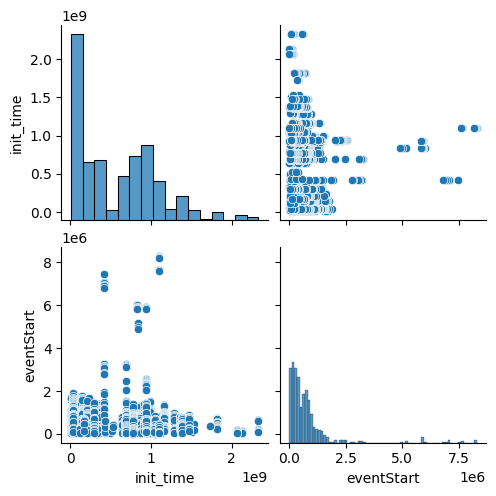

In [19]:
df_sub = df[["init_time", "eventStart"]]
sns.pairplot(data=df_sub)

In [21]:
np.percentile(df['eventGPSSignalStrength'], 99.9)

np.float64(289.72297140000006)

In [22]:
df['eventGPSSignalStrength'].describe()

count    1287.000000
mean       11.130416
std        23.344923
min         0.590333
25%         2.805208
50%         4.229379
75%        10.969387
max       293.877560
Name: eventGPSSignalStrength, dtype: float64